In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib inline

# importing data

In [4]:
data = pd.read_csv('Advertising_data.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [6]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# With simple linear regression

In [21]:
X = data['TV'].values.reshape(-1,1)
Y = data['sales'].values.reshape(-1,1)

Text(0, 0.5, 'sales ($)')

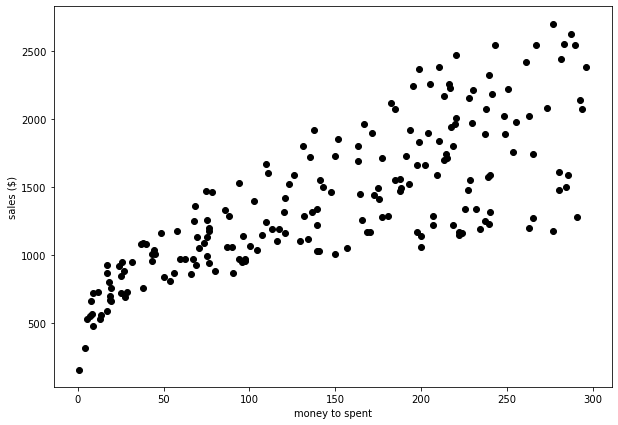

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X,Y, c='black')
plt.xlabel('money to spent')
plt.ylabel("sales ($)")



# splitting data for training and testing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

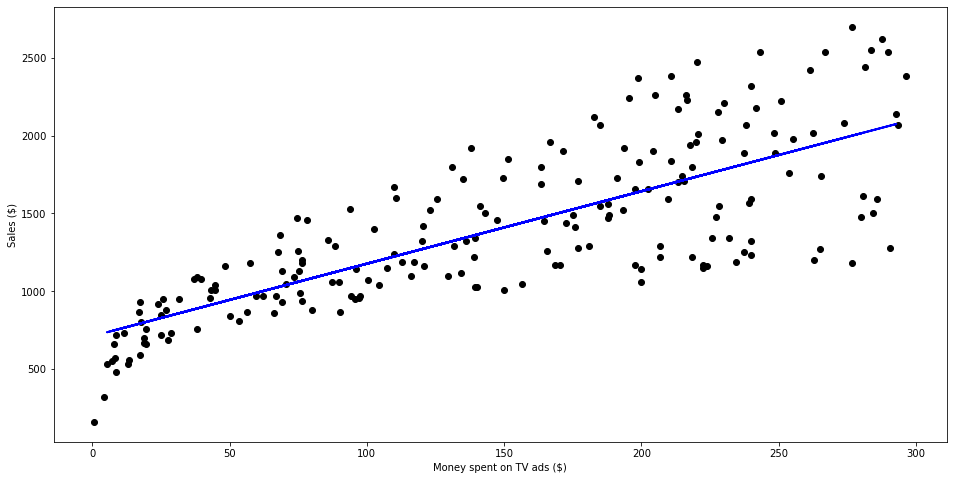

In [30]:

#predicting the Test set result
y_pred = model.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, Y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [32]:
#Calculating the Coefficients
model.coef_

array([[4.65297337]])

In [33]:
model.intercept_

array([711.96384306])

In [39]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.6766954295627075

In [41]:

output = model.predict([[230.1]])
output

array([[1782.61301562]])

# Multiple Linear Regression

In [42]:
X = data.drop(['sales'], axis=1)
Y = data['sales'].values.reshape(-1,1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [45]:

#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, Y_train)

LinearRegression()

In [46]:
y_pred = multiple_reg.predict(X_test)

In [47]:
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [48]:
multiple_reg.intercept_

array([297.90673381])

In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.899438024100912

In [52]:
#Taking the input from the user
print("Enter the amount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the amount you will invest on:
TV : 300
Radio : 500
Newspaper : 600
you will get Rs11265.21 sales by advertising Rs300.0 on TV, Rs500.0 on Radio and Rs600.0 on newspaper.


In [54]:
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/multiple_reg.sav"
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))